<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/fr/thumb/e/e5/Logo_%C3%A9cole_des_ponts_paristech.svg/676px-Logo_%C3%A9cole_des_ponts_paristech.svg.png" width="200"  height="200" hspace="200"/> </td>
<td> <img src="https://pbs.twimg.com/profile_images/1156541928193896448/5ihYIbCQ_200x200.png" width="200" height="200" /> </td>
</tr></table>

<br/>

<h1><center>Session 4 - Data preparation</center></h1>



<font size="3">This session is divided into **3** parts:
- **Data exploration**
- **Data preparation**
- **Feature engineering**

In each of these parts, some **guidelines** and **hints** are given for each task. 
Do not hesitate to check the links to documentation to understand the functions you use. 
    
The goal of this session is to **create the dataset** that you will use as an **input for modeling sessions** (supervised and
unsupervised).
</font>

# 0 - Useful libraries and functions

If you do not have the needed libraries already installed please run the following commands in a Terminal:
- pip install pandas
- pip install numpy
- pip install matplotlib
- pip install seaborn
- pip install holidays
- pip install vacances-scolaires-france

In [1]:
#!pip install holidays
#!pip install seaborn
#!pip install vacances_scolaires_france
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import holidays
from vacances_scolaires_france import SchoolHolidayDates

In [2]:
# Here are some functions we wrote to help you, feel free to check them out to see what they do
lang_to_keep = ['en', 'fr', 'es', 'it', 'ja', 'de']
country_to_keep = ['FR', 'US', 'GB', 'DE', 'BE', 'CA']
dict_genres = {
    'Drame': 'Drame',
    'Comédie': 'Comédie',
    'Romance': 'Romance',
    'Action': 'Action',
    'Thriller': 'Action',
    'Aventure': 'Action',
    'Crime': 'Action',
    'Guerre': 'Action',
    'Western': 'Action',
    'Familial': 'Familial',
    'Animation': 'Familial',
    'Fantastique': 'Fantastique',
    'Science-Fiction': 'Fantastique',
    'Horreur': 'Horreur',
    'Mystère': 'Other',
    'Musique': 'Other',
    'Histoire': 'Other',
    'Documentaire': 'Other',
    'Téléfilm': 'Other'
}


def read_movies_entrees(path):
    '''
    Read the box office dataset 
    and casts it as an usable pandas DataFrame

    Parameters
    ----------
    path: str
        path to the dataset

    Returns
    -------
    df: pd.DataFrame
        Data as DataFrame
    '''
    bo = read_from_json(path)
    bo = [
        {
            "year": item['year'], 
            "title": item['title'], 
            "id": int(item['id']), 
            "sales": item['first_week_sales'],
            "release_date": item['release_date']
        } for item in bo
    ]
    return pd.DataFrame(bo)


def read_movies_features(path):
    '''
    Read the movie features dataset 
    and casts it as an usable pandas DataFrame
    N.B: Fields that are not yet used are commented
    Parameters
    ----------
    path: str
        path to the dataset
    Returns
    -------
    df: pd.DataFrame
        Data as DataFrame
    '''
    features = read_from_json(path)
    features = [
        {
            "is_adult": item['adult'],
            "is_part_of_collection": not not item['belongs_to_collection'],
            "collection_name": item['belongs_to_collection']['name'] if item['belongs_to_collection'] != {} else None, # Currently simple bool, may be interesting to use a more complex feature later
            "budget": item['budget'],
            "genres": [ genre['name'] for genre in item['genres'] ], 
            "original_language": item['original_language'],
            "overview": item['overview'], # Not used yet. Blob of text
            "production_countries": [ country['iso_code'] for country in item['production_countries'] ],
            "languages": [ language['iso_code'] for language in item['languages'] ],
            "tagline": item['tagline'], # Not used yet. Blob of text
            "runtime": item['runtime'],
            "cast": item['cast'], # Not used yet. List of dicts with actor gender, name, id...
            "id": int(item['id'])
        } for item in features
    ]
    return pd.DataFrame(features)


def read_from_json(path):
    '''
    Read and cast a json into a python object
    
    Parameters
    ----------
    path: str
        Path to json file

    Returns
    -------
    data: Union[dict, list]
        Json casted as python object
    '''
    with open(path, 'r') as infile:
        data = json.load(infile)
    return data


def reduce_lang_categories(lang_list, lang_to_keep=lang_to_keep):
    return list(set([el if el in lang_to_keep else 'other' for el in lang_list]))


def reduce_country_categories(country_list, country_to_keep=country_to_keep):
    return list(set([el if el in country_to_keep else 'OTHER' for el in country_list]))


def reduce_genre_categories(genre_list, dict_genres=dict_genres):
    return list(set([dict_genres[el] for el in genre_list]))

# 1 - Data exploration

## 1.1 Load data

In [3]:
# We first read the french movies "entrées"
# Hint: you can use the function read_movies_entrees(), you just have to give the path to data as argument
df_boxoffice = read_movies_entrees('data/french-box-office-29nov2020.json')

In [4]:
# Then fetch their main features.
# Hint: you can use the function read_movies_features(), you just have to give the path to data as argument
df_features = read_movies_features('data/movie-features-29nov2020.json')

In [5]:
# Let's merge both dataframes and store them in a new dataframe named "data"
# Hint: you can use the function pd.merge(), you just have to find the right column to merge on (using the "on"
# argument) 
data = pd.merge(df_boxoffice, df_features, on='id')

In [6]:
# Explore the first lines of your dataset. Feel free to do that every time you implement a new feature
data.head(10)

,year,title,id,sales,release_date,is_adult,is_part_of_collection,collection_name,budget,genres,original_language,overview,production_countries,languages,tagline,runtime,cast
0,2019,Maléfique : Le Pouvoir du Mal,19073,786485,2019-10-16,False,True,Maléfique - Saga,185000000,"[Fantastique, Familial, Aventure]",en,Cinq années après la conjuration de la malédic...,[US],[en],Aller au-delà du conte de fée.,110.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 1170..."
1,2019,Nous finirons ensemble,18875,1261701,2019-05-01,False,True,Les Petits Mouchoirs - Saga,0,"[Comédie, Drame]",fr,"Préoccupé, Max est parti dans sa maison au bor...","[BE, FR]",[fr],,135.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 3316..."
2,2019,Spider-Man: Far from Home,18243,1370178,2019-07-03,False,True,Spider-Man (Avengers) - Saga,160000000,"[Action, Aventure, Science-Fiction]",en,Peter et ses amis passent leurs vacances d’été...,[US],"[cs, nl, en, de, it]",Il est temps de passer à l'action.,129.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1136..."
3,2019,Jumanji: next level,18258,785636,2019-12-04,False,True,Jumanji - Saga,125000000,"[Aventure, Comédie, Fantastique]",en,"L’équipe est de retour, mais le jeu a changé. ...",[US],[en],Bienvenue à Jumanji !,123.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 1891..."
4,2019,Dragons 3 : Le monde caché,18167,1224811,2019-02-06,False,True,Dragons - Saga,129000000,"[Animation, Familial, Aventure]",en,Ce qui avait commencé comme une amitié improba...,"[JP, US]",[en],Une amitié légendaire,104.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 449,..."
5,2019,Captain Marvel,18563,1254628,2019-03-06,False,True,Captain Marvel - Saga,152000000,"[Action, Aventure, Science-Fiction]",en,Captain Marvel raconte l’histoire de Carol Dan...,[US],[en],Notre monde aura besoin d'elle,123.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 6007..."
6,2019,Toy Story 4,15289,1505679,2019-06-26,False,True,Toy Story - Saga,175000000,"[Aventure, Animation, Comédie, Familial, Fanta...",en,Woody a toujours privilégié la joie et le bien...,[US],[en],Que la fête commence !,100.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 31, ..."
7,2019,Joker,18661,1606425,2019-10-09,False,False,None,55000000,"[Crime, Thriller, Drame]",en,"Dans les années 1980, à Gotham City, Arthur Fl...","[CA, US]",[en],Préparez votre plus beau sourire.,122.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 7342..."
8,2019,Star Wars: L'Ascension de Skywalker,17224,2420710,2019-12-18,False,True,Star Wars - Saga,250000000,"[Action, Aventure, Science-Fiction]",en,Lucasfilm et le réalisateur J.J. Abrams unisse...,[US],[en],Toute saga a une fin.,141.0,"[{'adult': False, 'gender': 1, 'tmdb_id': 4, '..."
9,2019,Qu'est-ce qu'on a encore fait au Bon Dieu ?,18084,2153093,2019-01-30,False,True,Qu'est-ce qu'on a fait au Bon Dieu ? - Saga,0,[Comédie],fr,Le retour des familles Verneuil et Koffi au gr...,[FR],[fr],,99.0,"[{'adult': False, 'gender': 2, 'tmdb_id': 2878..."


## 1.2 EDA on sales

In [7]:
# Check the characteristics of the feature "sales" of the dataset using statistics
# Hint: you can use the method .describe() on your dataframe on the right column
data['sales'].describe()

count    7.053000e+03
mean     1.853960e+05
std      3.390870e+05
min      0.000000e+00
25%      2.077800e+04
50%      6.846100e+04
75%      1.972830e+05
max      4.378720e+06
Name: sales, dtype: float64

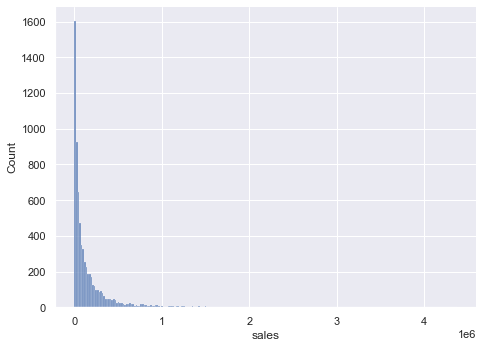

In [16]:
# Check the characteristics of the feature "sales" of the dataset using graph
# Hint: we advise you to use seaborn. Take a look at the example gallery and choose a graph that you think is 
# relevant to answer the question (https://seaborn.pydata.org/examples/index.html)
# NB: if you want to scale your graph in order to make it readable add the following arguments in your function:
# height=5, aspect=11/8 (ex: sns.lineplot(x=x, data=data, height=5, aspect=11/8))
sns.displot(data, x="sales", height=5, aspect=11/8)

In [13]:
# Is there any outlier in the dataset ? (e.g.: a movie with no sales)
# Explain how you would like to handle this issue?
print('Percentage of movies with no sales:', np.round(len(data[data["sales"] == 0])/len(data)*100, 2), '%')

Percentage of movies with no sales: 2.68 %


## 1.3 EDA on other features

In [14]:
# Explore other features of the dataset and keep note of your findings, it can help for the next parts
# Hint: you can use .info() on your dataframe to gather information on variables types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7053 entries, 0 to 7052
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   7053 non-null   int64  
 1   title                  7053 non-null   object 
 2   id                     7053 non-null   int64  
 3   sales                  7053 non-null   int64  
 4   release_date           7053 non-null   object 
 5   is_adult               7053 non-null   bool   
 6   is_part_of_collection  7053 non-null   bool   
 7   collection_name        947 non-null    object 
 8   budget                 7053 non-null   int64  
 9   genres                 7053 non-null   object 
 10  original_language      7053 non-null   object 
 11  overview               7053 non-null   object 
 12  production_countries   7053 non-null   object 
 13  languages              7053 non-null   object 
 14  tagline                7053 non-null   object 
 15  runt

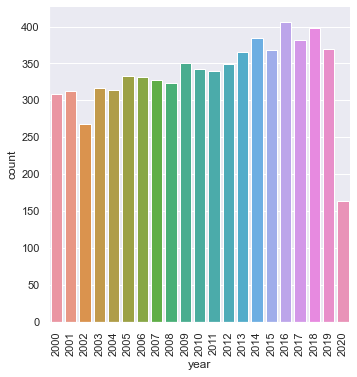

In [15]:
# Plot the distribution of movies across years. Fill the arguments: x, data, kind below
# Hint: we advise you to use seaborn. Take a look at the example gallery and choose a graph that you think is 
# relevant to answer the question (https://seaborn.pydata.org/examples/index.html)
# NB: if you want to scale your graph in order to make it readable add the following arguments in your function:
# height=5, aspect=11/8 (ex: sns.lineplot(x=x, data=data, height=5, aspect=11/8))
sns.set()
plot = sns.catplot(x="year", data=data, kind="count")
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

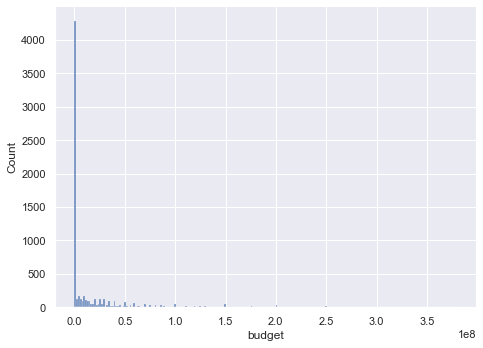

In [17]:
# Plot the distribution of the "budget" feature
# Hint: you can use sns.displot() for continuous variables or sns.catplot() for categorical variables. Choose well !
sns.displot(data, x="budget", height=5, aspect=11/8)

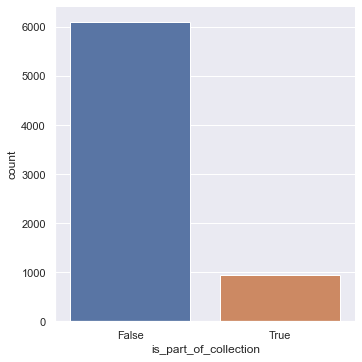

In [18]:
# Plot the distribution of the "is_part_of_collection" feature
# Hint: you can use sns.displot() for continuous variables or sns.catplot() for categorical variables. Choose well !
sns.catplot(x="is_part_of_collection", data=data, kind="count")

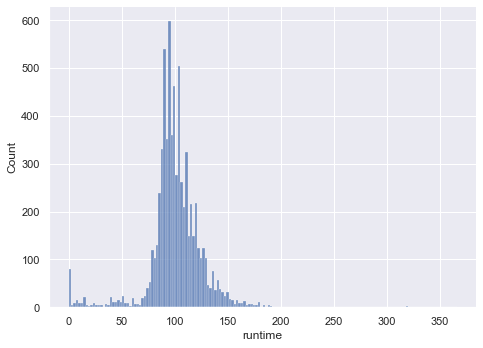

In [19]:
# Plot the distribution of the "runtime" feature
# Hint: you can use sns.displot() for continuous variables or sns.catplot() for categorical variables. Choose well !
sns.displot(data, x="runtime", height=5, aspect=11/8)

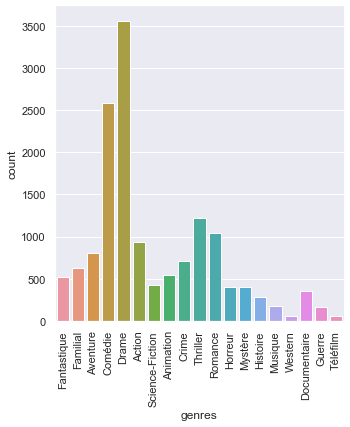

In [20]:
# For genres, languages, production countries, data comes in list for each movie, 
# we should preprocess these columns before plotting them. Here we flatten the lists into a bigger Series

def flatten_list_series(column):
    flattened_series = column.apply(pd.Series).stack().reset_index(drop=True)
    flattened_series.name = column.name
    return pd.DataFrame(flattened_series)

# Try to plot a histogram for these categorical features using sns.catplot() with the following argument:
# data=flatten_list_series(data['your_column'])
plot = sns.catplot(x='genres', data=flatten_list_series(data['genres']), kind="count")
for axes in plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

> **To go further:**
Explore the **"cast"** feature: 
 - What insights can you find? 
 - What kind of difficulties can you anticipate? 
 - How do you think we can use this feature for our model later?


# 2 - Data preparation

## 2.1 Missing values

In [22]:
# Missing/Zero values for sales
# Hint: check the number of missing values to see which approach is the best suited
print('Number of movies with no sales:', len(data.loc[(data['sales'] == 0) | (data['sales'].isnull() == True)]))
# We keep only movies with sales considering that missing values represent only 2.7% of the dataset
data = data.loc[data['sales'] != 0]

Number of movies with no sales: 189


In [23]:
# Missing/zero values for budget
# Hint: check the number of missing values to see which approach is the best suited
data.loc[data['budget'] == 0, 'budget'] = np.median(data.loc[data['budget'] != 0]['budget'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
# Missing/zero values for runtime
# Hint: check the number of missing values to see which approach is the best suited
runtime_mean = np.mean(data.loc[(data['runtime'] != 0) & (data['runtime'].isnull() == False)]['runtime'])
data.loc[(data['runtime'].isnull() == True) | (data['runtime'] == 0), 'runtime'] = runtime_mean

In [25]:
# To go further:
# Missing values for production countries
# Hint: you can use the column "original_language" (e.g.: if original_language is "FR", the production country
# is likely to be France)
data.loc[(data.astype(str)['production_countries'] == '[]') & (
    data['original_language'] == 'fr'), 'production_countries'] = ['FR']
data.loc[(data.astype(str)['production_countries'] == '[]') & (
    data['original_language'] == 'en'), 'production_countries'] = ['US']
data.loc[(data.astype(str)['production_countries'] == '[]'), 'production_countries'] = ['OTHER']

## 2.2 Reduce cardinality for categorical features

In [26]:
# Reduce number of categories for: Original language
# Hint: you can use the lang_to_keep variable from part 0, already imported. If the original language is in
# lang_to_keep then we keep it, otherwise we set the value to 'other'
data['original_language'] = data['original_language'].map(lambda x: x if x in lang_to_keep else 'other')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
# Reduce number of categories for: languages, production_countries and genres
# For example for languages:
data['languages'] = data['languages'].map(lambda x: reduce_lang_categories(x))

# Hint: for production_countries, you can use the reduce_country_categories() function from part 0,
# already imported
data['production_countries'] = data['production_countries'].map(lambda x: reduce_country_categories(x))

# Hint: for production_countries, you can use the reduce_genre_categories() function from part 0,
# already imported
data['genres'] = data['genres'].map(lambda x: reduce_genre_categories(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

## 2.3 Encoding

In [28]:
# Encode is_part_of_collection into numerical
# Hint: you can use a dictionary to map numerical values for each value of is_part_of_collection (True or False)
dict_collection = {
    True: 1,
    False: 0
}

data['is_part_of_collection'] = data['is_part_of_collection'].map(dict_collection)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# Encode original_language
# Hint: you can perform one-hot encoding with pd.get_dummies(), check documentation to see how to use it (
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
data_final = pd.get_dummies(data, prefix='original_lang', columns=['original_language'], drop_first=True)
data_final = data_final.set_index('id')

In [30]:
# Encode categorical features with multiple categories
# Hint: you can use MultiLabelBinarizer()

# Languages
mlb = MultiLabelBinarizer()
df_lang = pd.DataFrame(mlb.fit_transform(data_final['languages']), columns=mlb.classes_, index=data_final.index)
df_lang.columns = ['available_lang_' + col for col in df_lang.columns]

# Genres
mlb = MultiLabelBinarizer()
df_genre = pd.DataFrame(mlb.fit_transform(data_final['genres']), columns=mlb.classes_, index=data_final.index)

# Production countries
mlb = MultiLabelBinarizer()
df_country = pd.DataFrame(mlb.fit_transform(data_final['production_countries']), columns=mlb.classes_,
                          index=data_final.index)
df_country.columns = ['prod_' + col for col in df_country.columns]

In [31]:
# Merge encoded dataframes and store it into a new dataframe named data_final
# Hint: you can use the merge function from pandas, pd.merge(), check documentation to see how to use it
data_final = pd.merge(data_final, df_lang, left_index=True, right_index=True) \
               .merge(df_genre, left_index=True, right_index=True) \
               .merge(df_country, left_index=True, right_index=True)

# 3 - Feature engineering

## 3.1 Holidays

In [32]:
# Load school holidays for France
fr_holidays = SchoolHolidayDates()
df_vacances = pd.DataFrame()
for year in list(set(data_final['year'])):
    df_vacances = pd.concat([df_vacances, pd.DataFrame.from_dict(fr_holidays.holidays_for_year(year)).T])

# Load bank holidays for France
df_jf = pd.DataFrame()
for year in list(set(data_final['year'])):
    df_jf = pd.concat([df_jf, pd.DataFrame([
        {'date': el[0], 'jour_ferie': el[1]} for el in sorted(holidays.FRA(years=year).items())])])
    
# Merge school and bank holidays
df_holidays = pd.merge(df_vacances, df_jf, how='outer', on='date')

In [35]:
# Create features from df_holidays dataframes (school holidays and bank holidays):
# - 3 binary features for school holidays, taking 1 if the given zone is on holiday, else 0 (vacances_zone_a, 
# vacances_zone_b, vacances_zone_c)
dict_map_vac = {
    True: 1,
    False: 0
}
df_holidays['vacances_zone_a'] = df_holidays['vacances_zone_a'].map(dict_map_vac)
df_holidays['vacances_zone_b'] = df_holidays['vacances_zone_b'].map(dict_map_vac)
df_holidays['vacances_zone_c'] = df_holidays['vacances_zone_c'].map(dict_map_vac)

# - 1 binary feature for bank holiday, taking 1 if it is a bank holiday, else 0
df_holidays['jour_ferie'] = df_holidays['jour_ferie'].map(lambda x: 1 if str(x) != 'nan' else 0)

# - To go further: Try to create a combined feature with school and bank holidays
df_holidays['holiday'] = df_holidays['vacances_zone_a'] + df_holidays['vacances_zone_b'] + df_holidays[
    'vacances_zone_c'] + df_holidays['jour_ferie']

In [36]:
# Merge df_holidays that contains newly created features with the main dataframe and store it into data_final
df_holidays['date'] = df_holidays['date'].map(lambda x: str(x))
data_final_cal = pd.merge(data_final, df_holidays, how='left', left_on='release_date', right_on='date').fillna(0)

## 3.2 Calendar

In [37]:
# Create calendar features for month: 
# - the number of the month (named "month")
data_final_cal['month'] = data_final_cal['release_date'].map(lambda x: int(x[5:7]))

# To go further: try to transform the "month" variable using a mathematical function to capture cyclicity
# (January (1) comes right after December (12))

def apply_cos(df: pd.DataFrame,
              x: str, col_name: str, period: int) -> pd.DataFrame:
    """ Cos function on a column, for a specified period
    """
    df[col_name] = 2 * np.cos(2 * np.pi * df[x] / period)
    return df

data_final_cal = apply_cos(data_final_cal, 'month', 'cos_month', 12)

## 3.3 Collection

In [38]:
# Collection with an high number of movies are often sagas that have worked well (ex: Star Wars, Fast and
# Furious, ...)
# We can therefore use the variable "is_part_of_collection" to compute the number of movies per collection
# Hint: to create this kind of feature, you can use the .value_counts() method

# Exclude collections with only one movie
df_count_col = data_final_cal.groupby(['collection_name']).count().reset_index()
not_collection = list(set(df_count_col.loc[df_count_col['year'] < 2]['collection_name']))
data_final_cal.loc[data_final_cal['collection_name'].isin(not_collection), 'is_part_of_collection'] = 0
data_final_cal.loc[data_final_cal['collection_name'].isin(not_collection), 'collection_name'] = None

# Create the feature: number of movies per collection
map_col_count = dict(data_final_cal['collection_name'].value_counts())
del map_col_count[0]
data_final_cal['nb_movie_collection'] = data_final_cal['collection_name'].map(map_col_count)

In [39]:
# To go (much) further:
# Movies from a same collection will tend to have a similar number of sales
# We can therefore use the variable "is_part_of_collection" to calculate an average of the sales of previous films
# from the same collection
# Hint: to create this kind of feature, you can use the .groupby(), .transform(), .rolling(), .mean() and .shift()
# methods
df_collection = data_final_cal.loc[data_final_cal['is_part_of_collection'] == 1]
df_collection['rolling_sales_collection'] = df_collection.sort_values(by=['collection_name', 'release_date']) \
             .groupby('collection_name')['sales'] \
             .transform(lambda x: x.rolling(10, 1).mean().shift())


# Merge with main dataframe
cols = ['year', 'title', 'release_date', 'collection_name', 'sales', 'rolling_sales_collection']
df_all = pd.merge(data_final_cal, df_collection[cols], how = 'left', 
                  on = ['year', 'title', 'release_date', 'collection_name', 'sales']).fillna(0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## 3.4 [OPTIONAL] Casting

In [ ]:
# Explore the "cast" feature to understand its structure and try to identify its limits if not done in Part 1.

In [40]:
# A movie with bankable actors is more likely to have an important number of entrees than a movie with unknown 
# actors
# We can leverage the "cast" feature that contains information about actors and their popularity for each movie
# to create several features, for example:
# - for one movie, compute the mean popularity of its 3 main actors
# - for one movie, compute the mean popularity of its 5 main actors

df_all['mean_3_popularity'] = df_all['cast'].map(
    lambda x: np.mean([np.log(el['tmdb_popularity']) if np.log(el['tmdb_popularity']) > 0 else 0 for el in x[:3]])) \
    .fillna(0)

df_all['mean_5_popularity'] = df_all['cast'].map(
    lambda x: np.mean([np.log(el['tmdb_popularity']) if np.log(el['tmdb_popularity']) > 0 else 0 for el in x[:5]])) \
    .fillna(0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
# To go (much much) further:
# In the same vein, we could create features taking into account sales of previous movies per actor and create 
# features that represent:
# - for one movie, the mean of sales of previous movies of the #1 actor
# - for one movie, the mean of sales of previous movies of the #2 actor
# - for one movie, the mean of sales of previous movies of the #3 actor
# - for one movie, the mean or the maximum of the three features above
# This would also give an idea of an actor's "popularity"

df_all['actor_1'] = df_all['cast'].map(lambda x: x[0]['name'] if len(x) > 0 else None)
df_all['actor_2'] = df_all['cast'].map(lambda x: x[1]['name'] if len(x) > 1 else None)
df_all['actor_3'] = df_all['cast'].map(lambda x: x[2]['name'] if len(x) > 2 else None)
actors_list = set(list(set(df_all['actor_1'])) + list(set(df_all['actor_2'])) + list(set(df_all['actor_3'])))

k = 5
df_all = df_all.sort_values('release_date')
for actor in list(actors_list):
    data_actor = df_all.loc[(df_all['actor_1'] == actor) | (df_all['actor_2'] == actor) | (df_all['actor_3'] == actor)]
    data_actor['actor'] = actor
    data_actor['mean_sales'] = data_actor.groupby('actor')['sales'] \
        .transform(lambda x: x.rolling(k, 1).mean().shift()).fillna(0)
    df_all.loc[df_all['actor_1'] == actor, 'actor_1'] = data_actor.loc[data_actor['actor_1'] == actor, 'mean_sales']
    df_all.loc[df_all['actor_2'] == actor, 'actor_2'] = data_actor.loc[data_actor['actor_2'] == actor, 'mean_sales']
    df_all.loc[df_all['actor_3'] == actor, 'actor_3'] = data_actor.loc[data_actor['actor_3'] == actor, 'mean_sales']

df_all = df_all.rename({
    'actor_1': 'actor_1_sales',
    'actor_2': 'actor_2_sales',
    'actor_3': 'actor_3_sales'
}, axis=1)

df_all['mean_sales_actor'] = (df_all['actor_1_sales'] + df_all['actor_2_sales'] + df_all['actor_3_sales']) / 3
df_all['max_sales_actor'] = df_all[["actor_1_sales", "actor_2_sales", "actor_3_sales"]].max(axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 4 - Save file for next session

In [42]:
# Drop useless columns for modeling (not numerical columns, raw columns that have been transformed, ...)
# Hint: you can use the .drop() method
to_drop = ['nom_vacances', 'date', 'genres', 'production_countries', 'languages', 'is_adult', 'collection_name',
           'overview', 'tagline', 'cast']
df_all = df_all.drop(to_drop, axis=1).reset_index()

In [43]:
# Fill missing values due to feature engineering if any
# Hint: you can use the .fillna() method
df_all = df_all.fillna(0)

In [46]:
df_all.head()

,index,year,title,sales,release_date,is_part_of_collection,budget,runtime,original_lang_en,original_lang_es,...,cos_month,nb_movie_collection,rolling_sales_collection,mean_3_popularity,mean_5_popularity,actor_1_sales,actor_2_sales,actor_3_sales,mean_sales_actor,max_sales_actor
0,4652,2000,Une pour toutes,139087,2000-01-01,0,25000000.0,120.0,0,0,...,1.732051,0.0,0.0,0.489158,0.373572,0.0,0.0,0.0,0.0,0.0
1,6090,2000,Sixième sens,1463152,2000-01-05,0,25000000.0,77.0,0,1,...,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,2995,2000,Le Voyage de Felicia,32954,2000-01-05,0,25000000.0,116.0,1,0,...,1.732051,0.0,0.0,0.465217,0.346425,0.0,0.0,0.0,0.0,0.0
3,3000,2000,Summer of Sam,66228,2000-01-05,0,22000000.0,142.0,1,0,...,1.732051,0.0,0.0,1.404085,1.229533,0.0,0.0,0.0,0.0,0.0
4,2176,2000,La Légende du pianiste sur l'océan,25224,2000-01-12,0,9000000.0,165.0,0,0,...,1.732051,0.0,0.0,1.238290,0.907984,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Save file
# Hint: you can use the .to_csv() method
df_all.to_csv('data_prepared_session4.csv', index=None)